# 부동산 데이터를 사용하여 회귀분석 

## 1. 환경 설정과 데이터 준비

In [1]:
# 필요한 패키지 import

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline 

In [45]:
# 데이터 불러오기

data = pd.read_csv('Auction_master_train.csv')
data.head(5)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [46]:
data.shape

(1933, 41)

## 2. 전처리

In [47]:
# NA 처리 (0번지가 존재하지 않으므로 없는 값은 0으로 대체)
data["road_bunji1"].fillna(0, inplace=True)
data["addr_bunji1"].fillna(0, inplace=True)
data["addr_bunji2"].fillna(0, inplace=True)
data["road_bunji2"].fillna(0, inplace=True)

# 인코딩
data = pd.concat([data.drop(["Auction_class"], axis=1), pd.get_dummies(data["Auction_class"])], axis=1)
data = pd.concat([data.drop(["Bid_class"], axis=1), pd.get_dummies(data["Bid_class"])], axis=1)
data = pd.concat([data.drop(["Share_auction_YorN"], axis=1), pd.get_dummies(data["Share_auction_YorN"])], axis=1)
data = pd.concat([data.drop(["Final_result"], axis=1), pd.get_dummies(data["Final_result"])], axis=1)
data = pd.concat([data.drop(["Apartment_usage"], axis=1), pd.get_dummies(data["Apartment_usage"])], axis=1)
data = pd.concat([data.drop(["addr_do"], axis=1), pd.get_dummies(data["addr_do"])], axis=1)

# 공백 처리
data.loc[data["Close_result"]=='    ', 'Close_result'] = "배당없음"
data = pd.concat([data.drop(["Close_result"], axis=1), pd.get_dummies(data["Close_result"])], axis=1)

In [106]:
# 이상치 제거
data = data.drop(1521,)

In [107]:
data.shape

(1932, 48)

## 3. EDA

In [108]:
data.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,...,일반,N,Y,낙찰,아파트,주상복합,부산,서울,배당,배당없음
count,1932.000000,1.932000e+03,1932.000000,1932.000000,1.932000e+03,1932.000000,1932.000000,1932.000000,1932.000000,1.932000e+03,...,1932.000000,1932.000000,1932.000000,1932.0,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,1380.980331,3.659469e+08,1.834886,0.787267,3.460504e+04,40.975880,39.952324,94.265181,91.995124,4.832404e+08,...,0.929607,0.959110,0.040890,1.0,0.856625,0.143375,0.357660,0.642340,0.993789,0.006211
std,801.271172,1.323869e+09,0.937268,0.830406,9.444218e+04,26.395957,26.618421,48.473365,49.511388,4.845290e+08,...,0.255875,0.198087,0.198087,0.0,0.350545,0.350545,0.479436,0.479436,0.078586,0.078586
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,691.750000,7.736869e+07,1.000000,0.000000,2.997000e+03,25.870000,24.557500,61.467500,59.967500,2.090000e+08,...,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1395.500000,1.724291e+08,2.000000,1.000000,1.424140e+04,37.510000,36.750000,84.900000,84.855000,3.600000e+08,...,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2062.250000,3.562021e+08,2.000000,1.000000,4.140310e+04,51.760000,51.282500,114.940000,114.842500,5.720000e+08,...,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,603.200000,603.200000,1203.760000,1203.760000,5.810000e+09,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
print(data.columns.values)

['Auction_key' 'Claim_price' 'Appraisal_company' 'Appraisal_date'
 'Auction_count' 'Auction_miscarriage_count' 'Total_land_gross_area'
 'Total_land_real_area' 'Total_land_auction_area' 'Total_building_area'
 'Total_building_auction_area' 'Total_appraisal_price'
 'Minimum_sales_price' 'First_auction_date' 'Final_auction_date'
 'Creditor' 'addr_si' 'addr_dong' 'addr_li' 'addr_san' 'addr_bunji1'
 'addr_bunji2' 'addr_etc' 'Preserve_regist_date' 'Total_floor'
 'Current_floor' 'Specific' 'road_name' 'road_bunji1' 'road_bunji2'
 'Close_date' 'point.y' 'point.x' 'Hammer_price' '강제' '임의' '개별' '일괄' '일반'
 'N' 'Y' '낙찰' '아파트' '주상복합' '부산' '서울' '배당' '배당없음']


In [110]:
df_x = data.drop(['Hammer_price'],axis=1)
df_y = pd.DataFrame(data['Hammer_price'],columns=['Hammer_price'])

In [111]:
print(df_x.columns.values)

['Auction_key' 'Claim_price' 'Appraisal_company' 'Appraisal_date'
 'Auction_count' 'Auction_miscarriage_count' 'Total_land_gross_area'
 'Total_land_real_area' 'Total_land_auction_area' 'Total_building_area'
 'Total_building_auction_area' 'Total_appraisal_price'
 'Minimum_sales_price' 'First_auction_date' 'Final_auction_date'
 'Creditor' 'addr_si' 'addr_dong' 'addr_li' 'addr_san' 'addr_bunji1'
 'addr_bunji2' 'addr_etc' 'Preserve_regist_date' 'Total_floor'
 'Current_floor' 'Specific' 'road_name' 'road_bunji1' 'road_bunji2'
 'Close_date' 'point.y' 'point.x' '강제' '임의' '개별' '일괄' '일반' 'N' 'Y' '낙찰'
 '아파트' '주상복합' '부산' '서울' '배당' '배당없음']


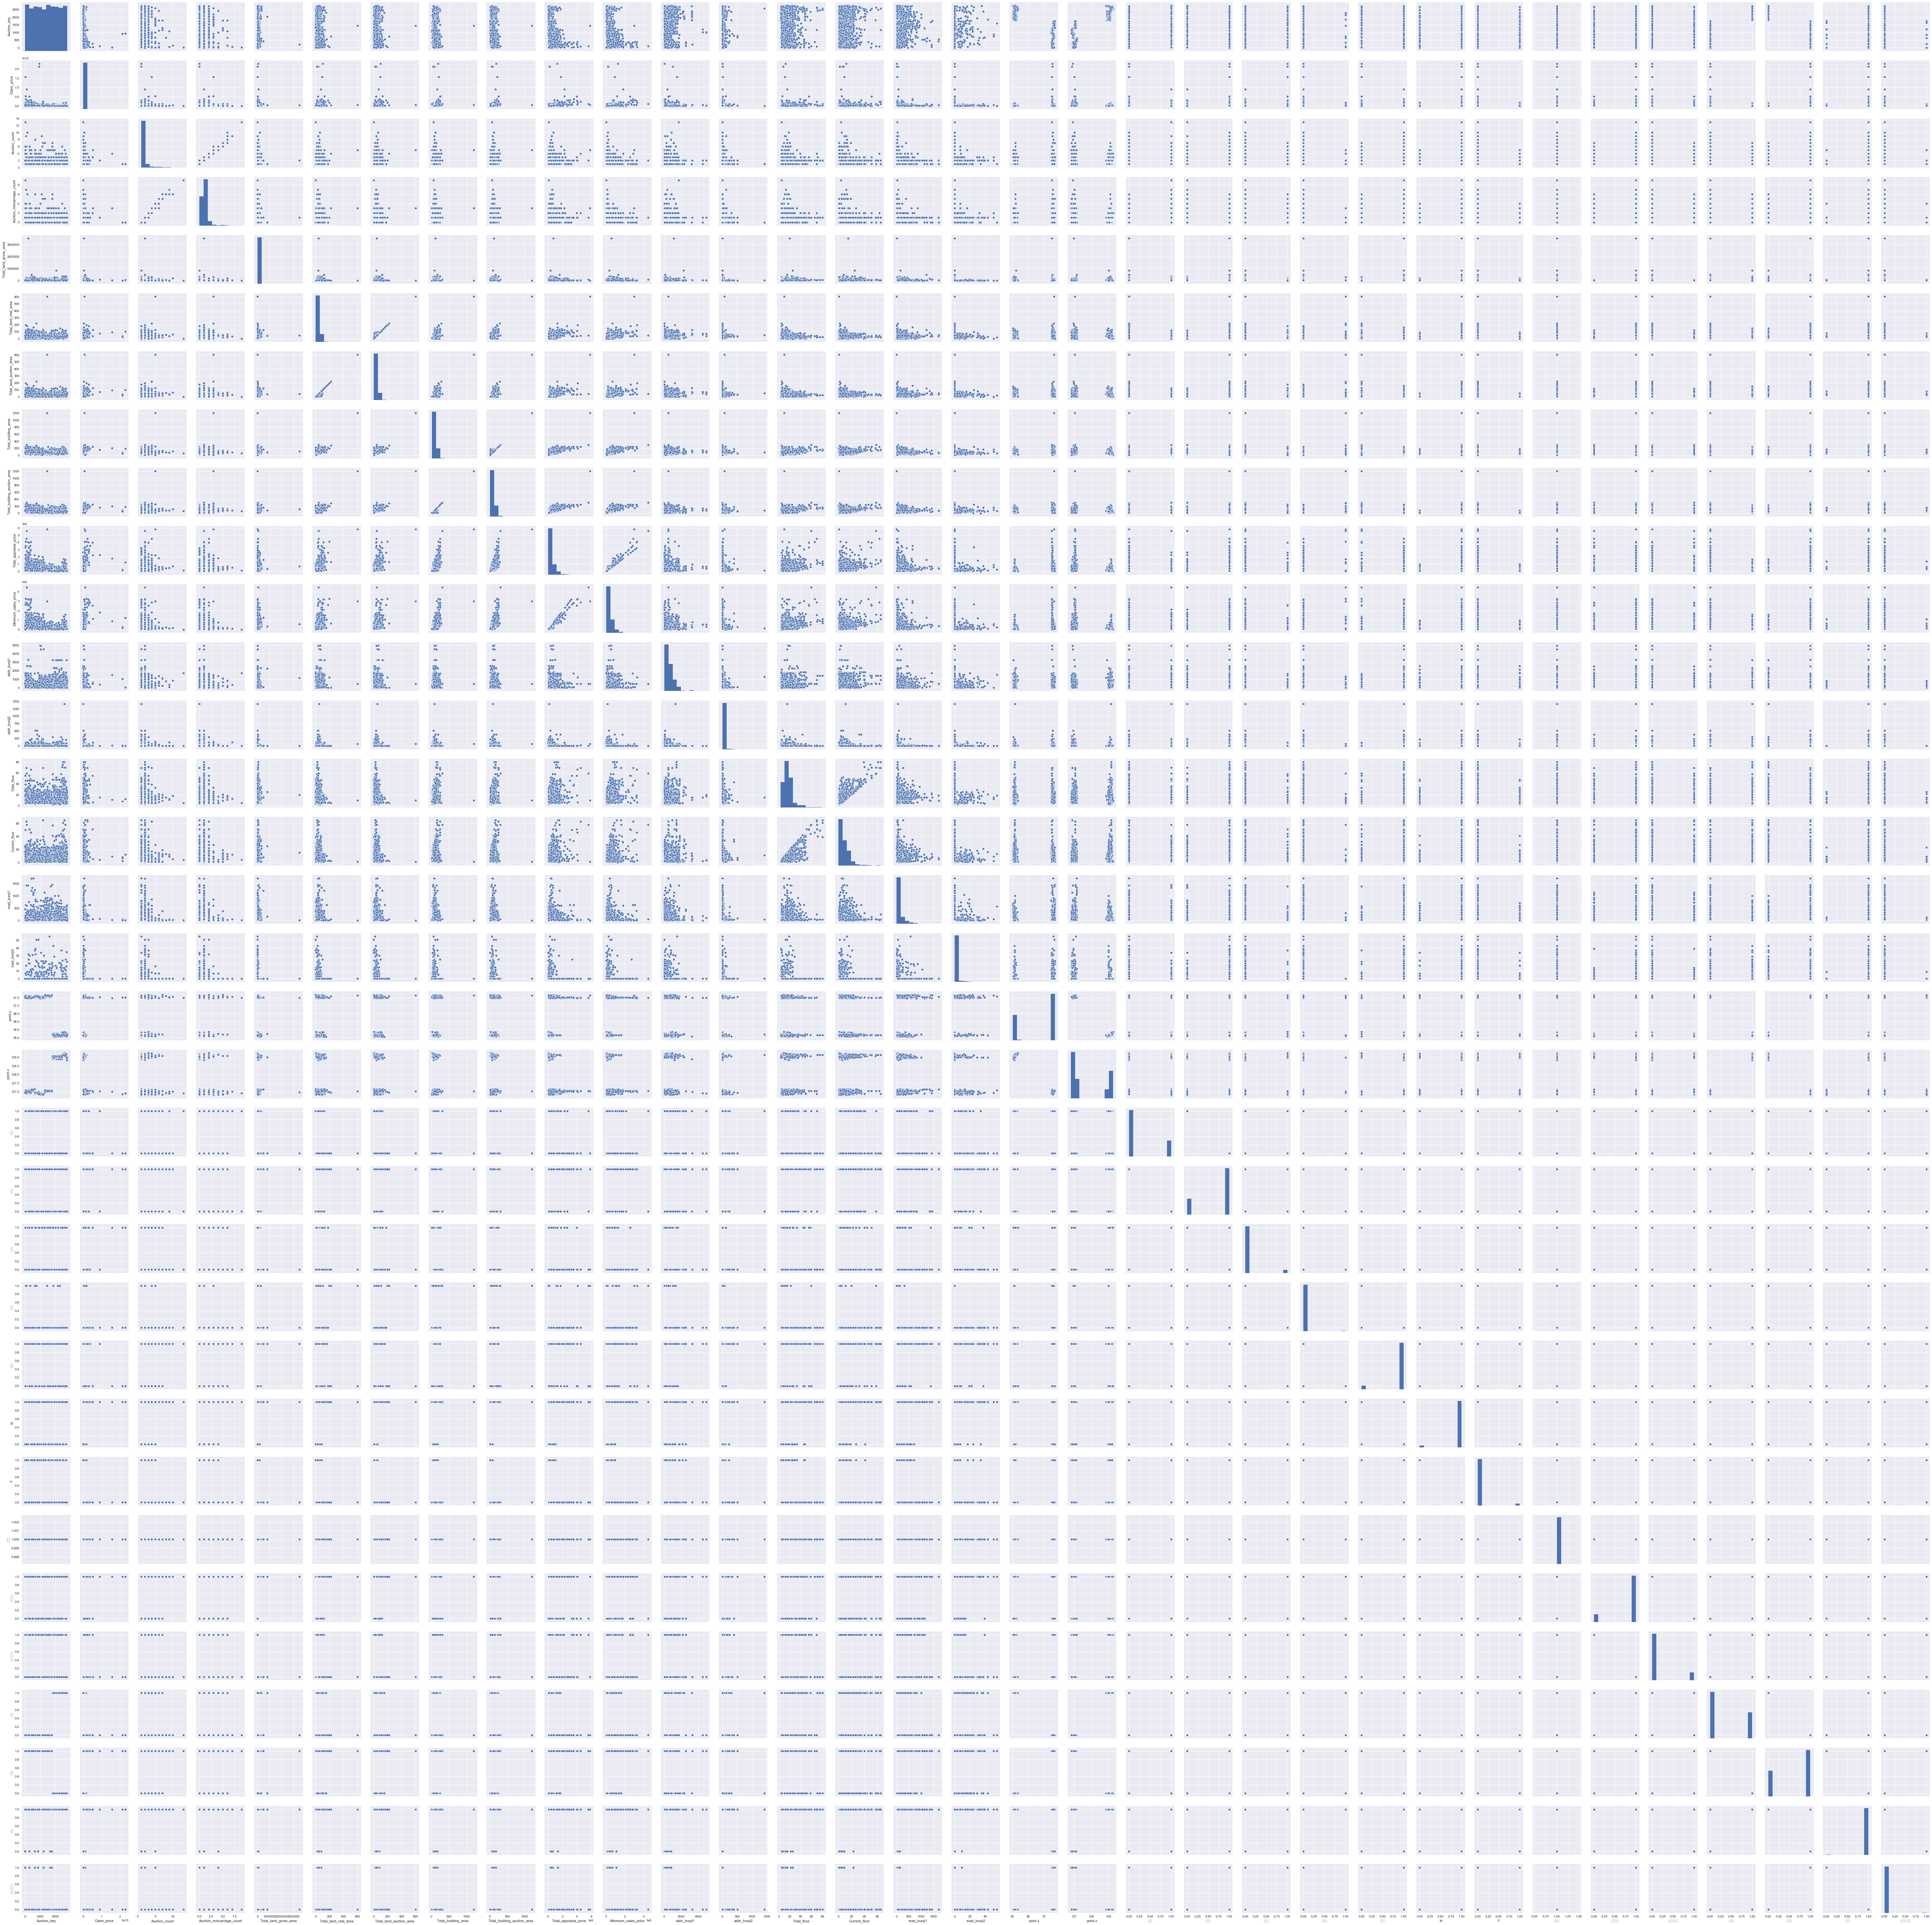

In [112]:
#산점도 행렬
sns.pairplot(df_x)

# Auction_count - Auction_miscarriage_count (강한 선형관계)
# Total_land_gross_area - Total_land_real_area - Total_land_auction_area - Total_building_area (강한 선형관계)
# Total_appraisal_price - Minimum_sales_price (선형관계)
# Total_floor - Current_floor (선형관계)

In [113]:
#상관계수 행렬
df_x.corr()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,...,일반,N,Y,낙찰,아파트,주상복합,부산,서울,배당,배당없음
Auction_key,1.000000,-0.132121,-0.018527,-0.010685,-0.021579,-0.158103,-0.142398,-0.200643,-0.178665,-0.475367,...,0.048179,0.050270,-0.050270,NaN,-0.009726,0.009726,0.827680,-0.827680,0.032311,-0.032311
Claim_price,-0.132121,1.000000,0.005717,0.006658,0.005043,0.117144,0.121237,0.160553,0.162732,0.219708,...,-0.264905,0.029513,-0.029513,NaN,0.005232,-0.005232,-0.098798,0.098798,0.004430,-0.004430
Auction_count,-0.018527,0.005717,1.000000,0.972864,-0.045324,0.036712,0.036732,0.132612,0.124884,0.048283,...,-0.175892,-0.019648,0.019648,NaN,-0.113071,0.113071,0.054273,-0.054273,-0.006900,0.006900
Auction_miscarriage_count,-0.010685,0.006658,0.972864,1.000000,-0.050046,0.035279,0.034753,0.141618,0.132244,0.048596,...,-0.185064,-0.024575,0.024575,NaN,-0.122623,0.122623,0.057231,-0.057231,-0.012322,0.012322
Total_land_gross_area,-0.021579,0.005043,-0.045324,-0.050046,1.000000,0.142024,0.137205,0.054458,0.051508,0.078786,...,0.052814,0.000586,-0.000586,NaN,0.130789,-0.130789,-0.016650,0.016650,0.010220,-0.010220
Total_land_real_area,-0.158103,0.117144,0.036712,0.035279,0.142024,1.000000,0.977079,0.685175,0.663107,0.487224,...,0.048855,-0.001331,0.001331,NaN,0.277953,-0.277953,-0.120027,0.120027,-0.015166,0.015166
Total_land_auction_area,-0.142398,0.121237,0.036732,0.034753,0.137205,0.977079,1.000000,0.674436,0.701057,0.499727,...,0.039676,0.184961,-0.184961,NaN,0.266929,-0.266929,-0.107020,0.107020,-0.015184,0.015184
Total_building_area,-0.200643,0.160553,0.132612,0.141618,0.054458,0.685175,0.674436,1.000000,0.969543,0.708215,...,0.014903,0.013617,-0.013617,NaN,-0.019895,0.019895,-0.114778,0.114778,0.001577,-0.001577
Total_building_auction_area,-0.178665,0.162732,0.124884,0.132244,0.051508,0.663107,0.701057,0.969543,1.000000,0.713400,...,0.004757,0.235442,-0.235442,NaN,-0.023367,0.023367,-0.097320,0.097320,0.002002,-0.002002
Total_appraisal_price,-0.475367,0.219708,0.048283,0.048596,0.078786,0.487224,0.499727,0.708215,0.713400,1.000000,...,-0.025035,0.104332,-0.104332,NaN,-0.026965,0.026965,-0.351189,0.351189,-0.001511,0.001511


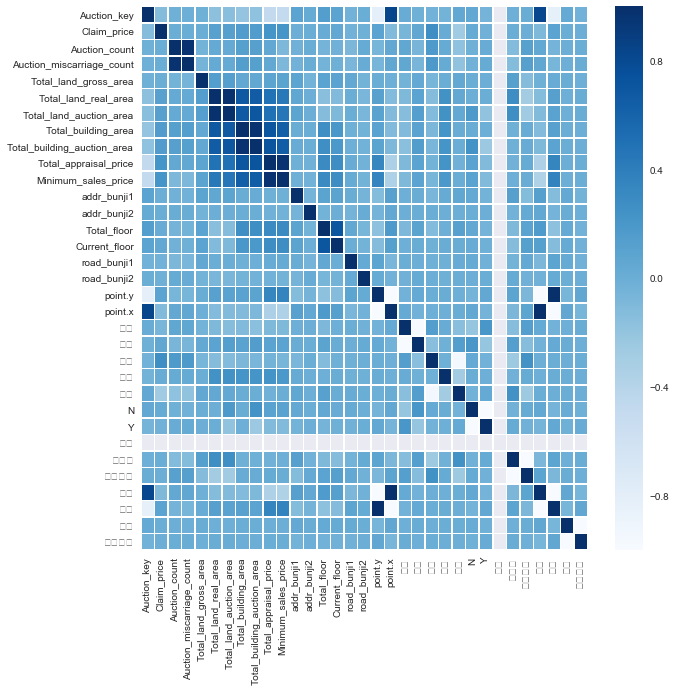

In [114]:
#상관계수 행렬
plt.figure(figsize=(10,10))
sns.heatmap(data = df_x.corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [115]:
# df_x 에서 칼럼 선택하기 (문자열로 구성된 열 제거)

print(df_x.dtypes)
df_x = df_x.select_dtypes(include ={'float64', 'int64', 'uint8'}) 

Auction_key                      int64
Claim_price                      int64
Appraisal_company               object
Appraisal_date                  object
Auction_count                    int64
Auction_miscarriage_count        int64
Total_land_gross_area          float64
Total_land_real_area           float64
Total_land_auction_area        float64
Total_building_area            float64
Total_building_auction_area    float64
Total_appraisal_price            int64
Minimum_sales_price              int64
First_auction_date              object
Final_auction_date              object
Creditor                        object
addr_si                         object
addr_dong                       object
addr_li                         object
addr_san                        object
addr_bunji1                    float64
addr_bunji2                    float64
addr_etc                        object
Preserve_regist_date            object
Total_floor                      int64
Current_floor            

In [116]:
# 결측치
df_x.isna().sum()

Auction_key                    0
Claim_price                    0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
addr_bunji1                    0
addr_bunji2                    0
Total_floor                    0
Current_floor                  0
road_bunji1                    0
road_bunji2                    0
point.y                        0
point.x                        0
강제                             0
임의                             0
개별                             0
일괄                             0
일반                             0
N                              0
Y                              0
낙찰                             0
아파트                            0
주상복합                           0
부산                             0
서울        

In [117]:
# VIF확인
# 상관계수는 두 변수 간의 상관 관계만 측정하므로 다중공선성 진단에 VIF, Condition Index 사용

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_x.values, i) for i in range(df_x.shape[1])]

vif["features"] = df_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

# 다중공선성이 있다고 판단되는 변수
# 낙찰 제외 인코딩된 변수들
# point.x, point.y, Total_land_auction_area, Total_land_real_area, Total_building_auction_area
# Total_building_area, Total_appraisal_price, Minimum_sales_price, Auction_miscarriage_count, Auction_count, Auction_key

,VIF Factor,features
32,inf,배당없음
19,inf,강제
23,9.007199e+15,일반
25,9.007199e+15,Y
24,4.503600e+15,N
28,9.007199e+14,주상복합
22,8.188363e+14,일괄
21,7.505999e+14,개별
20,6.928615e+14,임의
31,5.629500e+14,배당


## 4. 모델링

In [118]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [119]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()

#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
#fit된 모델의 R-square

model.score(X_train, y_train)

0.9871477318432434

In [121]:
#MSE

import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2651076607778145.5

In [122]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[[-1.16232906e+04  3.37310563e-03 -2.55018871e+07  3.08532910e+07
   1.32001163e+01  4.95445472e+05 -1.79276056e+05 -1.77309081e+05
  -7.80637766e+04  2.07776022e-01  8.72510163e-01 -3.04048472e+03
  -8.16765809e+04  1.64924017e+05 -3.87361894e+05  3.87028681e+03
  -7.75049635e+04 -5.01515365e+07  5.36406629e+07  2.97986991e+06
  -2.97986991e+06 -3.97269418e+06 -5.92244937e+06  9.89514356e+06
   1.02989631e+07 -1.02989631e+07  0.00000000e+00  5.05177528e+06
  -5.05177528e+06 -1.12621743e+08  1.12621743e+08  1.55175996e+06
  -1.55175996e+06]]
[-5.0062178e+09]


In [123]:
#test데이터 예측
model.predict(X_test)

array([[4.27914211e+08],
       [7.68609464e+07],
       [1.51535811e+08],
       [1.84123033e+08],
       [6.85713172e+08],
       [8.13727522e+07],
       [3.85165847e+08],
       [3.25360869e+09],
       [9.55535766e+08],
       [3.14698228e+08],
       [7.30843475e+08],
       [2.04042344e+08],
       [4.50286473e+08],
       [3.64453005e+08],
       [9.59380771e+07],
       [2.51054979e+08],
       [9.95915352e+07],
       [1.33983744e+08],
       [8.55651512e+08],
       [1.28837921e+09],
       [4.16312923e+08],
       [2.16479105e+08],
       [2.36802920e+08],
       [1.87856706e+08],
       [1.69619747e+08],
       [1.52776107e+08],
       [5.91964639e+08],
       [4.85678442e+08],
       [3.98782181e+08],
       [5.87757767e+07],
       [4.06237273e+08],
       [3.34554718e+08],
       [5.89431304e+08],
       [3.58299904e+08],
       [4.06273814e+08],
       [3.32108348e+08],
       [4.77098764e+08],
       [6.47053951e+08],
       [5.76375907e+08],
       [8.72398960e+08],


In [124]:
#test데이터 R-square

model.score(X_test, y_test)

0.9882846556296768

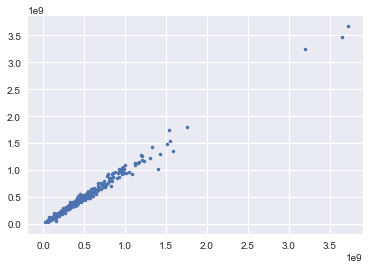

In [125]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [126]:
# MSE: 2651076607778145.5
# train R^2 : 0.9871477318432434
# test R^2 : 0.9882846556296768

In [131]:
df_x.columns

Index(['Auction_key', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_bunji1',
       'addr_bunji2', 'Total_floor', 'Current_floor', 'road_bunji1',
       'road_bunji2', 'point.y', 'point.x', '강제', '임의', '개별', '일괄', '일반', 'N',
       'Y', '낙찰', '아파트', '주상복합', '부산', '서울', '배당', '배당없음'],
      dtype='object')

In [132]:
#다중공선성이 너무 큰 변수들 제거하기

data2 = data[['Auction_key', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_bunji1',
       'addr_bunji2', 'Total_floor', 'Current_floor', 'road_bunji1',
       'road_bunji2', 'point.y', 'point.x', 'Hammer_price', '낙찰']]
data2.head()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,...,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price,낙찰
0,2687,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,...,1398.0,0.0,45,5,30.0,0.0,35.162717,129.137048,760000000,1
1,2577,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,...,1407.0,0.0,70,51,33.0,0.0,35.156633,129.145068,971889999,1
2,2197,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,...,552.0,0.0,15,14,88.0,0.0,35.184601,128.996765,93399999,1
3,2642,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,...,243.0,23.0,20,11,110.0,0.0,35.154180,129.089081,256899000,1
4,1958,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,...,399.0,2.0,7,7,51.0,0.0,35.099630,128.998874,158660000,1


In [133]:
df2_x = data2.drop(['Hammer_price'], axis=1)
df2_y = pd.DataFrame(data2['Hammer_price'],columns=['Hammer_price'])
df2_x.head()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,낙찰
0,2687,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,1398.0,0.0,45,5,30.0,0.0,35.162717,129.137048,1
1,2577,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,1407.0,0.0,70,51,33.0,0.0,35.156633,129.145068,1
2,2197,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,552.0,0.0,15,14,88.0,0.0,35.184601,128.996765,1
3,2642,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,243.0,23.0,20,11,110.0,0.0,35.154180,129.089081,1
4,1958,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,399.0,2.0,7,7,51.0,0.0,35.099630,128.998874,1


In [134]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [135]:
#모델 불러옴
model = LinearRegression()

#train data에 fit시킴
model.fit(X_train, y_train)

#fit된 모델의 R-square
model.score(X_train, y_train)

0.9869457604809272

In [136]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2692737857570590.5

In [137]:
#test데이터 R-square
model.score(X_test, y_test)

0.9881924142740586

In [138]:
# 변화: 기존의 값과 비교했을 때 큰 차이는 없다. 

# MSE: 2651076607778145.5   ---->   2692737857570590.5
# train R^2 : 0.9871477318432434   --->   0.9869457604809272
# test R^2 : 0.9882846556296768   --->   0.9881924142740586

### 4-1. 정규화

In [139]:
from sklearn.linear_model import Ridge, Lasso

In [140]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train) #R^2

0.986945366729748

In [141]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

# 정규화 정도를 낮추면 R squared 값이 극소폭 증가

0.9869457207981466

In [143]:
lasso=Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.9869457601929

In [142]:
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

# 정규화 정도를 낮추면 R squared 값이 극소폭 증가

0.9869457601930144

#### 참고자료

- VIF (https://freshrimpsushi.tistory.com/810)
- R squared 와 MSE의 관계 (https://jinchory.tistory.com/332)